# Homework 1

Feel free to use this notebook as your report for the programming part of the homework. In other words, you can put plots and print out results right here, no need to put it in the pdf (though you can if you want!). Just make sure that you **discuss**/**describe** your results somewhere.

Please keep in mind that
***all the numbers/results given in your report here should be reproducible by us***.

In [1]:
### IMPORT DEPENDENCIES ###
%matplotlib widget
%matplotlib inline

import numpy
import random
import matplotlib.pyplot as plot

from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import pickle

In [2]:
### VISUALIZATION METHODS ### 

# method to visualize the decision boundary for binary classifier. Will be used later.
def vis_hyperplane(clf,x,y):
    plot.scatter(x[:,0],x[:,1],c=y)
    ax = plot.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = numpy.linspace(xlim[0], xlim[1], 30)
    yy = numpy.linspace(ylim[0], ylim[1], 30)
    YY, XX = numpy.meshgrid(yy, xx)
    xy = numpy.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    plot.show()
    
#method for visualizing decision boundary of multiclass classifier. Used later
def multivis(mlog,x_train,y_train):
    x_min, x_max = x_train[:, 0].min() - .5, x_train[:, 0].max() + .5
    y_min, y_max = x_train[:, 1].min() - .5, x_train[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h), numpy.arange(y_min, y_max, h))
    Z = mlog.predict(numpy.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plot.figure(1, figsize=(4, 3))
    plot.pcolormesh(xx, yy, Z, cmap=plot.cm.Paired)

    # Plot also the training points
    plot.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', cmap=plot.cm.Paired)

    plot.xlim(xx.min(), xx.max())
    plot.ylim(yy.min(), yy.max())
    plot.xticks(())
    plot.yticks(())

    plot.show()

## Part 1: SVM with SciKit Learn

In the first part of this practical section you have to implement an *SVM classifier* using the *scikit* learn library.

### Data

Please use the make_blob function as we did in the lab to produce some random training and validation 2-dimensional datasets with 2 centers (1500 training and 500 samples). Please use a random_seed.

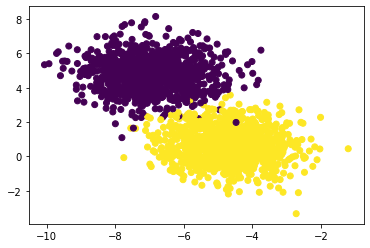

In [3]:
### MAKE DATASETS HERE ###
random_seed = 12
x, y = make_blobs(n_samples=2000, centers=2, n_features=2, random_state=random_seed)

x_train = x[:1500]
y_train = y[:1500]
x_val = x[1500:]
y_val = y[1500:]

plot.figure()
plot.scatter(x[:,0],x[:,1],c=y)

### Model

Describe the model you used here, use LaTeX math to write down equations.

Hint: the model definition in scikit learn is very similar to what we did in the lab with logistic regression.

 Our model is a support Vector machine, whose cost function is listed in the documentation as $$\frac{1}{2} w^Tw + C \sum_{i=1}^n\zeta_i$$. This differs from the formula we learned in class, which was : $$J_{svm}(M,D_{tra}) = \frac{C}{2}|w|^2 + \sum_{x,y\in D_{tra}} D_{hinge}(y,x,M).$$ We note that the $w^Tw = |w|^2$, meaning that both equations have a $w^Tw$ term, just with different coefficients. By using this cost function, our model maximizes the margin by minimizing the squared norm of $w$, $|w|^2$, making sure as much of the data as possible is both correctly classified and outside a certain margin around the decision boundary. The other term in SKLearn's model is $C \sum_{i=1}^n\zeta_i$, which is a more general formulation of summed distance using some complex distance function $Distance(x_i, y_i, M) = \zeta_i.$ The reason it is written in this general format is for more complex Kernel SVM's used to make nonlinear regressions.


In [4]:
#our SVM classifier, clf, taken off the shelf from the sklearn svm module.
clf =svm.LinearSVC(tol=1e-3, random_state=random_seed)

### Learning

Perform the training of your model on your training dataset and report the accuracy/error here. Mean accuracy rate on the training data is $0.9913333333333333$.

In [5]:
#using the ready-made function to train our model. 
clf.fit(x_train, y_train)
clf.score(x_train, y_train)

0.9913333333333333

### Analysis

Do the analysis of your model here:

Compute the error rate on the validation set, discuss the result. Can it be trained better? If not, why?

You can plot the class boundary priduced by your model to make your arguments stronger.

With a mean accuracy of 0.996, our error rate is 0.004, or 0.4%. This is very low! Using our current method, we can only change the parameters we input to the constructor of our classifier clf. We note that our error is $1-0.996 = 0.004 > 1$ e-3. SO our stopping criteria were not met when our function stopped. This means lowering that parameter would change nothing, and in that sense we cannot do any better with our given function.  

In [6]:
print("Mean accuracy is:")
clf.score(x_val, y_val)

Mean accuracy is:


0.996

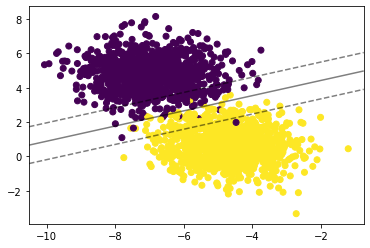

In [7]:
### DO THE ANALYSIS HERE ###
vis_hyperplane(clf,x,y)

## Train an SVM model with our data 




### Data
Load the SVM_data you can find here: https://nyu.box.com/s/103nz1rwiavev314kdwasop36hmtx2gm. There are 4 pickle files there: (x_train.pkl, y_train.pkl, x_val.pkl, y_val.pkl) which contain 2-dimensional features and their corresponding binary labels.  You'll need to use the [pickle](https://docs.python.org/3/library/pickle.html) library to read the data. Sample code to read it: 

```
# Read data with pickle
x_train = pickle.load(open("SVM_data/x_train.pkl", "rb"))
```


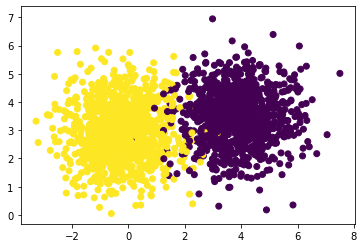

In [8]:
### LOAD DATA ###
x_train = pickle.load(open('SVM_data/x_train.pkl','rb'))
y_train = pickle.load(open('SVM_data/y_train.pkl','rb'))
x_val = pickle.load(open('SVM_data/x_val.pkl','rb'))
y_val = pickle.load(open('SVM_data/y_val.pkl','rb'))
plot.figure()
plot.scatter(x_train[:,0],x_train[:,1],c=y_train )
plot.scatter(x_val[:,0],x_val[:,1],c=y_val )

### Model 
Define a model to train on the data you loaded.

In [9]:
clf = svm.LinearSVC(tol=1e-3,random_state = random_seed )

### Learning
Perform the training of the model on our training dataset and report the accuracy/error here.
Mean accuracy rate on the training data is $0.9826666666666667$.

In [10]:
### DO THE TRAINING HERE ###
clf.fit(x_train, y_train)
clf.score(x_train, y_train)

0.9826666666666667

### Analysis

Do the analysis of your model here:

Compute the error rate on the validation set, discuss the result. Can it be trained better? If not, why?

You can plot the class boundary priduced by your model to make your arguments stronger.

With a mean accuracy of 0.978,we have an error rate of 0.022 = 2.2%, we are well above our tolerance value, so as before, lowering this would not change our results. However, we notice in the graph this data has a lot of overlap around the decision boundary. Using a support vector machine, we try to maximize both accuracy of our model (using the sum of distances in the cost function) and the margin(using $\frac{1}{2} * w^Tw$ in the same cost function). However, given the large amount of overlapping/misclassified points near the decision boundary ,and the tightness/near-non-existence of the space between the two class blobs, our data appears somewhat ill-conditioned for margin maximization. While we cannot train this model better, perhaps we would reach higher accuracy by training a different model, whose focus is not on maximizing the margin but solely minimizing cost.  

In [11]:
clf.score(x_val, y_val)

0.978

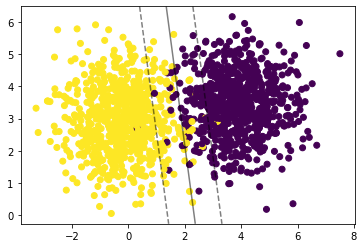

In [12]:
vis_hyperplane(clf, x_train,y_train)

## Part 2 : Multiclass classifier with SciKit Learn

In the second part of this practical section you have to implement a *Multiclass classifier* using *scikit* learn library.

### Data

Please use the make_blob function as we did in the lab to produce some random training and validation 2-dimensional datasets with 3 centers (1500 training and 500 samples). Please use a random_seed.

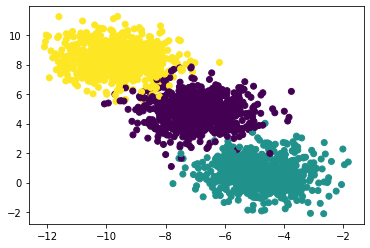

In [13]:
### MAKE DATASETS HERE ###
x, y = make_blobs(n_samples=2000, centers=3, n_features=2, random_state=random_seed)

x_train = x[:1500]
y_train = y[:1500]
x_val = x[1500:]
y_val = y[1500:]

plot.figure()
plot.scatter(x[:,0],x[:,1],c=y)

### Model

Describe the model you used here, use LaTeX math to write down equations.

Here, we are using the Logistic Regression "one vs. rest" multi-class classifier. At a high level, the idea of "OvR" classification is that for each class, you create a corresponding binary classifier which calculates the odds of a given x being in that class vs being in any other class. More precisely, the documentation tells us that our OvR classifier uses the following cost function for binary classification: $$\frac{1}{2} w^Tw + C\sum_{i=1}^n log(exp(-y_i(X_i^Tw + c)) + 1).$$, where $y_i \in \{-1,1\}$, and $y_i=1$ when $x_i$ in the relevant class (one) and $y_i = -1$ when $x_i$ not in the relevant class (vs. rest). For each class $k$, create a set of $y_i$'s for each $x_i$ by using the training data and setting new $y_i = 1$ when training $y_i = k$ and new$y_i = -1$ otherwise. Then, find $argmin_{(w,c)}$ of the above cost function, and you have defined a binary classifier for class $k$.  This is how our model creates a binary classifier for each class.


In [14]:
mlog = LogisticRegression(random_state = 12, multi_class = 'ovr', solver = 'lbfgs')

### Learning

Perform the training of your model on your training dataset and report the accuracy/error here. 
Mean accuracy rate on the training data is $0.982$.

In [15]:
### DO THE TRAINING HERE ###
mlog.fit(x_train, y_train)
mlog.score(x_train, y_train)

0.982

### Analysis

Do the analysis of your model here:

Compute the error rate on the validation set, discuss the result. Can it be trained better? If not, why?

The validation set had a mean accuracy of $0.976 = 97.6$%, meaning the error rate is $0.024$ = $2.4$%.Using a logistic regression classifier, changing hyper-parameters does not seem to change the accuracy at all (trying multinomial vs OvR; or changing the solver, which only decreases accuracy). It would be innaccurate to say there is no better approach to fit this data, however, because there are many different cost functions that could be used with the logistic regression multiclass classifier model. For example, instead of the distance function used by sklearn, we could have used the one we learned in class : $-y_ilog(\sigma(w^Tx_i + b))$. We could also have used a softmax classifier. As we are trusting the model chosen by sklearn, we cannot test all the possible variations of the current model to see which is best, but it is possible one of those would more accurately train the data.

score is 0.976000


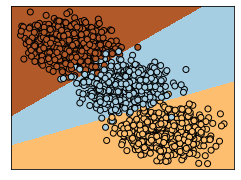

In [16]:
print("score is %f"%mlog.score(x_val, y_val))
multivis(mlog,x,y)

## Train a multiclass classifier with our data 

### Data
Load the Multiclass_data you can find here: https://nyu.box.com/s/103nz1rwiavev314kdwasop36hmtx2gm. There are 4 pickle files there: (x_train.pkl, y_train.pkl, x_val.pkl, y_val.pkl) which contain 2-dimensional features and their corresponding labels from 3 classes. Follow instructions from above on how to use pickle to read the data. 

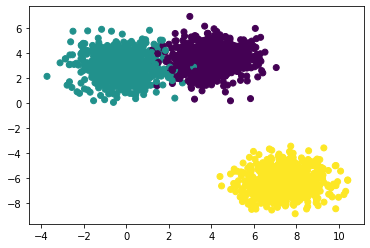

In [17]:
### LOAD DATA ###
x_train = pickle.load(open('Multiclass_data/x_train.pkl','rb'))
y_train = pickle.load(open('Multiclass_data/y_train.pkl','rb'))
x_val = pickle.load(open('Multiclass_data/x_val.pkl','rb'))
y_val = pickle.load(open('Multiclass_data/y_val.pkl','rb'))
plot.figure()
plot.scatter(x_train[:,0],x_train[:,1],c=y_train)
plot.scatter(x_val[:,0],x_val[:,1], c = y_val)

### Model 
Define a model to train on the data you loaded.

In [18]:
### DEFINE A MODEL HERE ###
mlog = LogisticRegression(random_state = random_seed, multi_class = 'ovr', solver = 'lbfgs')

### Learning
Perform the training of the model on our training dataset and report the accuracy/error here.
Mean accuracy rate on the training data is $0.9866666666666667$.

In [19]:
mlog.fit(x_train,y_train)
mlog.score(x_train,y_train)

0.9866666666666667

### Analysis

Do the analysis of your model here:
Compute the error rate on the validation set, discuss the result. Can it be trained better? If not, why?

This model has mean accuracy of validation set equal to $0.99$, meaning we have an error rate of $0.01$. This is better than the last example, which is a good sign that our model is relatively accurate. In answering this question the first time around, I led myself to discover that indeed, I could train this model better. Below is the most recent model,but below that is what I originally had. Let's examine that. Observing the graph of the decision boundary, we notice that our model defines boundaries close to the two blobs at the top, and far away from the blob in the bottom right. Particularly on the left decision boundary(yellow/brown), our margin here appears much larger on the right than on the left. Ideally, to maximize our margins, we would have the intersection of our 3 decision boundaries be equidistant to each blob, so that margins are the same on either side of each boundary line. If we could achieve this by adjusting our model, we would successfully train this model better. In fact, after simply adding the parameter: solver="lbfgs"(a method similar to gradient descent for minimizing cost) to the constructor of the model, as I was instructed to do by the FutureWarning which was generated, we notice that the boundary center has moved to the middle and the margins on either side of each decision boundary(most importantly the leftmost one) appear much closer to being equal distance than they were before. It should be noted that both models have the same mean accuracy rate of validation which is $0.99$. So by adjusting the parameters, we maximized the margin of our decision boundary while maintaining high accuracy and thusly trained our model better.

accuracy of 0.990000


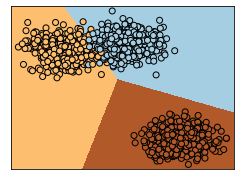

In [20]:
### DO THE ANALYSIS HERE ###
print("accuracy of %f"%mlog.score(x_val,y_val))
multivis(mlog,x_train,y_train)

WORSE MODEL BELOW

/Users/owenjones/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy of 0.990000


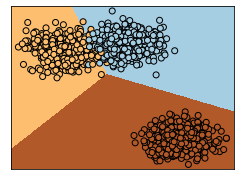

In [21]:
#training and displaying the old model, before using the lbfgs solver
m_log_worse_margin = LogisticRegression(random_state = 12, multi_class = 'ovr')
m_log_worse_margin.fit(x_train,y_train)
print("accuracy of %f"%m_log_worse_margin.score(x_val,y_val))
multivis(m_log_worse_margin,x_train,y_train)

CITATIONS: 
             - used our logistic regression lab to get inspiration for how to load in data , use some hyper parameters in sklearn, and how to plot initial data. 
             - used sklearn documentation found at https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html for support vector machines
             - used sklearn documentation found at https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression for logistic multiclass classification
             - used sklearn documentation found at https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html to plot decision boundary for support vector machines.
             - used sklearn documentation found at https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html to plot multiclass classification decision boundaries.
